<a href="https://colab.research.google.com/github/klimapires/Bootcamp_IGTI_Python/blob/main/Challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O uso de bicicletas como meio de transporte ganhou muita força nos últimos anos,
seja por questões ambientais, de saúde ou até mesmo de infraestrutura de trânsito. Para
incentivar seu uso, cidades em todo o mundo têm implementado programas de
compartilhamento de bicicleta. Nesses sistemas, elas são retiradas e devolvidas em
quiosques automatizados que ficam espalhados por diversos pontos da cidade.
As plataformas de compartilhamento de bicicletas costumam coletar diversos tipos
de dados, como a duração da viagem, as localizações iniciais e finais dos percursos, entre
outros. Esses dados, em conjunto com informações sobre o clima, o trânsito e o relevo, por
exemplo, possibilitam uma análise mais robusta do compartilhamento de bicicletas.

---

Segue um descritivo dos dados coletados:
- **rec_id** : índice do registro de locação;
- **datetime** : data;
- **season** : estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono). Relativo ao
hemisfério norte;
- **year** : ano (0: 2011, 1:2012);

- **month** : mês (1 a 12);
- **hour** : hora do dia (0 a 23);
- **is_holiday** : booleano indicando feriado;
- **weekday** : dia da semana (0: domingo, 1: segunda-feira, ..., 6: sábado);
- **is_workingday** : booleano indicando dia útil;
- **weather_condition** : (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte);
- **temp** : Temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39;
- **atemp** : Sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50;
- **humidity** : Humidade relativa (0 a 1);
- **windspeed** : Velocidade do vento escalada entre 0 e 1 (máximo original: 67);
- **casual** : número de locações para usuários casuais;
- **registered** : número de locações para usuários registrados;
- **total_count** : contador total de aluguéis (casual+registered).
Esta atividade tem como objetivo analisar os dados de compartilhamento de bicicletas em
uma cidade, coletados pela Universidade do Porto.

In [19]:
#importando bibliotecas
import numpy as np
import pandas as pd
from google.colab import drive

In [20]:
#Montando GDrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Leitura da base de dados
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bike-sharing.csv')

In [ ]:
#Instalando pacotes do pandas profiling 
!pip install pandas-profiling
!pip install --upgrade pandas-profiling

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Rent bike")

In [8]:
profile

### **A. Qual o tamanho desse dataset?**

In [37]:
dimensions=df.shape
print("Tamanho do dataset:", dimensions)

Tamanho do dataset: (17379, 17)


### **B. Qual a média da coluna windspeed?**

In [38]:
ws=df['windspeed'].mean()
print('Média da coluna windspeed: %2.7f' %(ws))

Média da coluna windspeed: 0.1900976


###**C. Qual a média da coluna temp?**

In [39]:
temp=df['temp'].mean()
print("Média da coluna temp: %2.7f" %(temp))

Média da coluna temp: 0.4969872


###**D. Quantos registros existem para o ano de 2011?**

In [40]:
#df.query('year==0').sum
df[df['datetime'] <= '2011-12-31']

datetime  rec_id  season  ...  casual  registered  total_count
0     2011-01-01       1       1  ...       3          13           16
1     2011-01-01       2       1  ...       8          32           40
2     2011-01-01       3       1  ...       5          27           32
3     2011-01-01       4       1  ...       3          10           13
4     2011-01-01       5       1  ...       0           1            1
...          ...     ...     ...  ...     ...         ...          ...
8640  2011-12-31    8641       1  ...      19          73           92
8641  2011-12-31    8642       1  ...       8          63           71
8642  2011-12-31    8643       1  ...       2          50           52
8643  2011-12-31    8644       1  ...       2          36           38
8644  2011-12-31    8645       1  ...       4          27           31

[8645 rows x 17 columns]

###**E. Quantos registros existem para o ano de 2012?**

In [41]:
# df.query('year==1').sum
df[df['datetime'] >= '2012-01-01']

datetime  rec_id  season  ...  casual  registered  total_count
8645   2012-01-01    8646       1  ...       5          43           48
8646   2012-01-01    8647       1  ...      15          78           93
8647   2012-01-01    8648       1  ...      16          59           75
8648   2012-01-01    8649       1  ...      11          41           52
8649   2012-01-01    8650       1  ...       0           8            8
...           ...     ...     ...  ...     ...         ...          ...
17374  2012-12-31   17375       1  ...      11         108          119
17375  2012-12-31   17376       1  ...       8          81           89
17376  2012-12-31   17377       1  ...       7          83           90
17377  2012-12-31   17378       1  ...      13          48           61
17378  2012-12-31   17379       1  ...      12          37           49

[8734 rows x 17 columns]

### **F. Quantas locações de bicicletas foram efetuadas em 2011?**

In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [50]:
# setando o índice
df = df.set_index('datetime')

In [ ]:
df.head()

In [55]:
total2011 = df.loc[df.index <= "2011-12-31", 'total_count'].sum()
print('Total de locações realizadas em 2011:', total2011)

Total de locações realizadas em 2011: 1243103


###**G. Quantas locações de bicicletas foram efetuadas em 2012?**

In [60]:
total2012 = df.iloc[df.index >= "2012-01-01", [-1]].sum()
print('Total de locações realizadas em 2012:', total2012)

Total de locações realizadas em 2012: total_count    2049576
dtype: int64


###**H. Qual estação do ano contém a maior média de locações de bicicletas?**
###**I. Qual estação do ano contém a menor média de locações de bicicletas?**

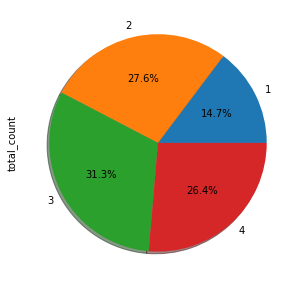

In [80]:
df.groupby(by='season').mean()['total_count'].plot.pie(autopct='%1.1f%%',
                                             shadow=True,
                                             figsize=(8, 5));

### **J. Qual horário do dia contém a maior média de locações de bicicletas?**

### **K. Qual horário do dia contém a menor média de locações de bicicletas?**

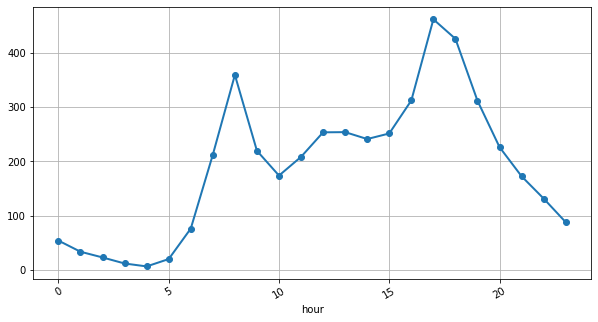

In [88]:
df.groupby(by='hour').mean()['total_count'].plot(style='-o', linewidth=2, figsize=(10, 5), rot=30, grid=True);

### **L. Que dia da semana contém a maior média de locações de bicicletas?**
### **M. Que dia da semana contém a menor média de locações de bicicletas?**

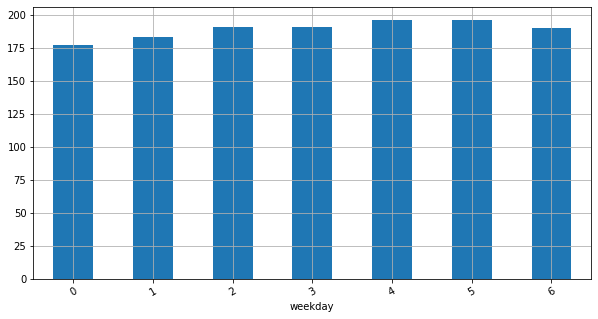

In [87]:
df.groupby(by='weekday').mean()['total_count'].plot(kind='bar', figsize=(10, 5), rot=30, grid=True);

### **N. Às quartas-feiras (weekday = 3), qual o horário do dia contém a maior média de locações de bicicletas?**

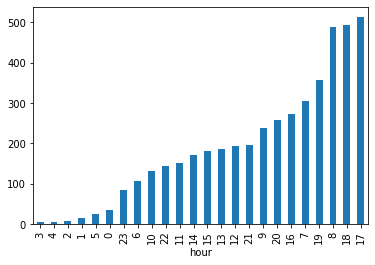

In [102]:
dia = df[df.weekday == 3]
dia.groupby('hour')['total_count'].mean().sort_values(ascending=True).plot(kind='bar')

### **O. Aos sábados (weekday = 6), qual o horário do dia contém a maior média de locações de bicicletas?**

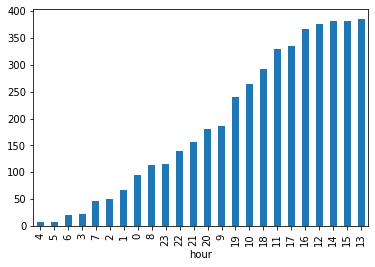

In [103]:
dia = df[df.weekday == 6]
dia.groupby('hour')['total_count'].mean().sort_values(ascending=True).plot(kind='bar')